In [1]:
pip install pandas numpy librosa matplotlib seaborn scikit-learn keras

DEPRECATION: Loading egg at /home/lab2208/anaconda3/lib/python3.11/site-packages/chainer-7.8.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/lab2208/anaconda3/lib/python3.11/site-packages/pcanet-0.0.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/lab2208/anaconda3/lib/python3.11/site-packages/recommonmark-0.7.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/lab2208/anaconda3/lib/python3.11/site-packages/commonmark-0.9.1-py3.11.

In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and array operations

import os  # Provides functions to interact with the operating system
import sys  # Provides access to system-specific parameters and functions

# Librosa is a library for audio and music analysis. It allows extraction of features from audio files.
import librosa  
import librosa.display  # Provides visualization tools for audio data

import seaborn as sns  # For creating statistical data visualizations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For feature scaling and encoding categorical data
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating classification models
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# IPython.display.Audio is used to play audio directly in Jupyter Notebooks
from IPython.display import Audio  

import keras  # High-level API for building and training deep learning models
from keras.callbacks import ReduceLROnPlateau  # Reduces learning rate when a metric stops improving
from keras.models import Sequential  # Linear stack of layers for building neural networks
from keras.layers import (Dense, Conv1D, MaxPooling1D, Flatten, Dropout, 
                          BatchNormalization)  # Various layers for constructing the neural network

import warnings  # Provides control over warning messages
# Suppress warnings to clean up the output
if not sys.warnoptions:
    warnings.simplefilter("ignore")  # Ignore all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Specifically ignore deprecation warnings


2025-08-06 15:32:56.312007: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-06 15:32:56.947867: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Define the file paths to different datasets containing emotional speech audio.

# RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song)
# This dataset contains audio recordings of speech performed with different emotions.
Ravdess = "dataset/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

# CREMA-D (Crowd-sourced Emotional Multimodal Actors Dataset)
# This dataset contains audio-visual recordings of actors performing with various emotions.
Crema = "dataset/cremad/AudioWAV/"

# TESS (Toronto Emotional Speech Set)
# This dataset includes emotional speech data recorded by female speakers with different emotional expressions.
Tess = "dataset/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"

# SAVEE (Surrey Audio-Visual Expressed Emotion)
# This dataset includes audio recordings of speech expressing different emotions, recorded by male speakers.
Savee = "dataset/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [4]:
# List all actor directories in the RAVDESS dataset
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []  # To store emotion labels
file_path = []  # To store file paths

# Iterate through each actor's directory and process audio files
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0].split('-')  # Parse metadata from file name
        file_emotion.append(int(part[2]))  # Extract emotion label
        file_path.append(Ravdess + dir + '/' + file)  # Store full file path

# Create DataFrames for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combine emotion and path DataFrames
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Map numeric emotion labels to descriptive names
Ravdess_df.Emotions.replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}, inplace=True)

# Display the first few rows of the DataFrame
Ravdess_df.head()


,Emotions,Path
0,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
1,sad,dataset/ravdess-emotional-speech-audio/audio_s...
2,happy,dataset/ravdess-emotional-speech-audio/audio_s...
3,happy,dataset/ravdess-emotional-speech-audio/audio_s...
4,calm,dataset/ravdess-emotional-speech-audio/audio_s...


In [5]:
# List all files in the CREMA-D dataset
crema_directory_list = os.listdir(Crema)

file_emotion = []  # To store emotion labels
file_path = []  # To store file paths

# Iterate through files and extract file paths and emotions
for file in crema_directory_list:
    file_path.append(Crema + file)  # Store file path
    part = file.split('_')  # Parse metadata from file name
    # Map file metadata to emotion labels
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# Create DataFrames for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combine emotion and path DataFrames
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the DataFrame
Crema_df.head()


,Emotions,Path
0,happy,dataset/cremad/AudioWAV/1030_IEO_HAP_MD.wav
1,sad,dataset/cremad/AudioWAV/1010_TSI_SAD_XX.wav
2,angry,dataset/cremad/AudioWAV/1048_ITH_ANG_XX.wav
3,fear,dataset/cremad/AudioWAV/1009_IEO_FEA_MD.wav
4,sad,dataset/cremad/AudioWAV/1078_IWW_SAD_XX.wav


In [6]:
# List all directories in the TESS dataset
tess_directory_list = os.listdir(Tess)

file_emotion = []  # To store emotion labels
file_path = []  # To store file paths

# Iterate through each directory and process files
for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)  # List all files in the current directory
    for file in directories:
        part = file.split('.')[0].split('_')[2]  # Extract emotion from the file name
        # Map 'ps' to 'surprise', otherwise use the extracted part
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)  # Store full file path

# Create DataFrames for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combine emotion and path DataFrames
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the DataFrame
Tess_df.head()

,Emotions,Path
0,happy,dataset/toronto-emotional-speech-set-tess/TESS...
1,happy,dataset/toronto-emotional-speech-set-tess/TESS...
2,happy,dataset/toronto-emotional-speech-set-tess/TESS...
3,happy,dataset/toronto-emotional-speech-set-tess/TESS...
4,happy,dataset/toronto-emotional-speech-set-tess/TESS...


In [7]:
# List all files in the SAVEE dataset
savee_directory_list = os.listdir(Savee)

file_emotion = []  # To store emotion labels
file_path = []  # To store file paths

# Iterate through each file and extract file paths and emotions
for file in savee_directory_list:
    file_path.append(Savee + file)  # Store full file path
    part = file.split('_')[1]  # Extract the emotion code from the file name
    ele = part[:-6]  # Remove the last 6 characters to isolate the emotion code
    # Map emotion codes to corresponding emotion labels
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# Create DataFrames for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combine emotion and path DataFrames
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the DataFrame
Savee_df.head()


,Emotions,Path
0,happy,dataset/surrey-audiovisual-expressed-emotion-s...
1,disgust,dataset/surrey-audiovisual-expressed-emotion-s...
2,happy,dataset/surrey-audiovisual-expressed-emotion-s...
3,surprise,dataset/surrey-audiovisual-expressed-emotion-s...
4,fear,dataset/surrey-audiovisual-expressed-emotion-s...


In [8]:
# Combine all the individual DataFrames (RAVDESS, CREMA-D, TESS, SAVEE) into a single DataFrame
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Save the combined DataFrame to a CSV file for future use
data_path.to_csv("data_path.csv", index=False)

# Display the first few rows of the combined DataFrame
data_path.head()


,Emotions,Path
0,neutral,dataset/ravdess-emotional-speech-audio/audio_s...
1,sad,dataset/ravdess-emotional-speech-audio/audio_s...
2,happy,dataset/ravdess-emotional-speech-audio/audio_s...
3,happy,dataset/ravdess-emotional-speech-audio/audio_s...
4,calm,dataset/ravdess-emotional-speech-audio/audio_s...


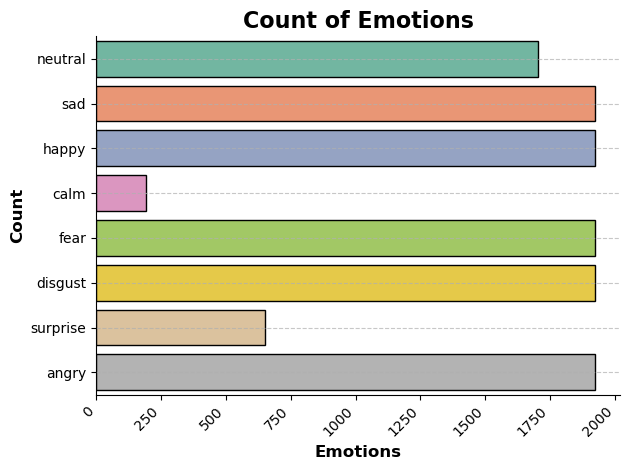

In [9]:
# Set the title of the plot with a larger font and bold styling
plt.title('Count of Emotions', size=16, weight='bold')

# Create a count plot for the 'Emotions' column with a custom color palette
sns.countplot(data_path.Emotions, palette='Set2', edgecolor='black')

# Label the axes with a larger font size and bold styling
plt.ylabel('Count', size=12, weight='bold')
plt.xlabel('Emotions', size=12, weight='bold')

# Customize the ticks for better readability
plt.xticks(rotation=45, ha='right', size=10)

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True, left=False, bottom=False)

# Add gridlines to the background for better visibility of the counts
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits
plt.show()

In [ ]:
# Function to create a waveplot for the audio data
def create_waveplot(data, sr, e):
    # Set the figure size for the waveplot
    plt.figure(figsize=(10, 3))
    # Set the title for the plot, displaying the emotion associated with the audio
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    # Display the waveplot using librosa's waveshow function with explicit parameters
    try:
        librosa.display.waveshow(y=data, sr=sr)
    except AttributeError:
        # Fallback to basic matplotlib plot if librosa.display.waveshow fails
        time_axis = librosa.frames_to_time(np.arange(len(data)), sr=sr)
        plt.plot(time_axis, data)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
    # Show the plot
    plt.show()

# Function to create a spectrogram for the audio data
def create_spectrogram(data, sr, e):
    # Convert the audio data into a Short-Time Fourier Transform (STFT)
    X = librosa.stft(data)
    # Convert the amplitude of the STFT to decibels (dB)
    Xdb = librosa.amplitude_to_db(abs(X))
    
    # Set the figure size for the spectrogram
    plt.figure(figsize=(12, 3))
    # Set the title for the plot, displaying the emotion associated with the audio
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    
    # Display the spectrogram using librosa's specshow function
    try:
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
        # Display the colorbar for the spectrogram to represent dB values
        plt.colorbar(format='%+2.0f dB')
    except AttributeError:
        # Fallback to basic matplotlib imshow if librosa.display.specshow fails
        plt.imshow(Xdb, aspect='auto', origin='lower', 
                   extent=[0, len(data)/sr, 0, sr/2])
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.colorbar(format='%+2.0f dB')
    
    # Show the plot
    plt.show()

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

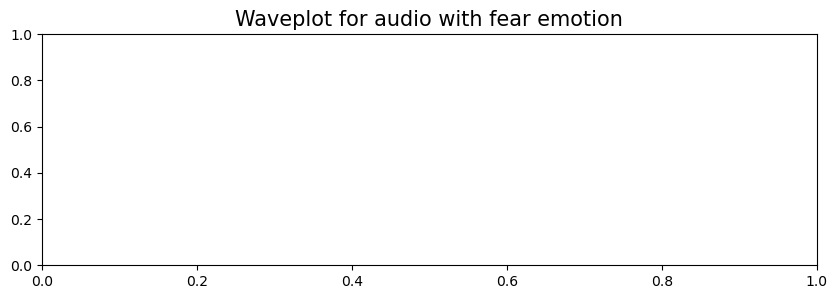

In [11]:
# Set the emotion to visualize (e.g., 'fear')
emotion = 'fear'

# Get the file path for the specified emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio file and get the data and sample rate
data, sampling_rate = librosa.load(path)

# Create a waveplot for the audio
create_waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the audio
create_spectrogram(data, sampling_rate, emotion)

# Play the audio from the file path
Audio(path)


In [ ]:
# Set the emotion to visualize (e.g., 'angry')
emotion = 'angry'

# Get the file path for the specified emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio file and get the data and sample rate
data, sampling_rate = librosa.load(path)

# Create a waveplot for the audio
create_waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the audio
create_spectrogram(data, sampling_rate, emotion)

# Play the audio from the file path
Audio(path)


AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

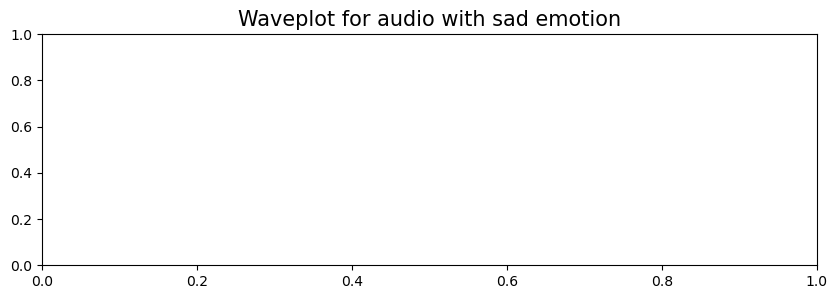

In [12]:
# Set the emotion to visualize (e.g., 'sad')
emotion = 'sad'

# Get the file path for the specified emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio file and get the data and sample rate
data, sampling_rate = librosa.load(path)

# Create a waveplot for the audio
create_waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the audio
create_spectrogram(data, sampling_rate, emotion)

# Play the audio from the file path
Audio(path)


AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

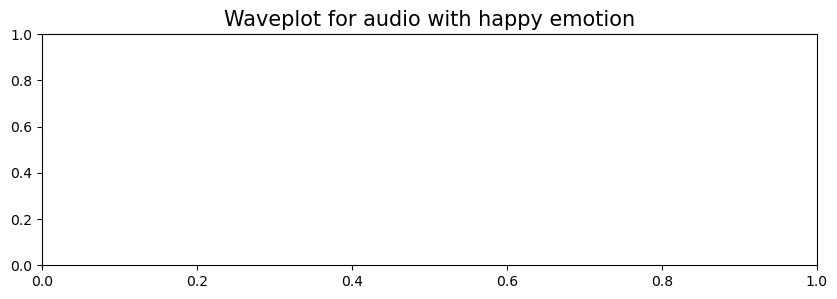

In [13]:
# Set the emotion to visualize (e.g., 'happy')
emotion = 'happy'

# Get the file path for the specified emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio file and get the data and sample rate
data, sampling_rate = librosa.load(path)

# Create a waveplot for the audio
create_waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the audio
create_spectrogram(data, sampling_rate, emotion)

# Play the audio from the file path
Audio(path)


In [14]:
# Function to add random noise to the audio data
def noise(data):
    # Generate a random amplitude for the noise
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    # Add Gaussian noise to the audio data
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

# Function to stretch the audio data in time
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

# Function to randomly shift the audio data
def shift(data):
    # Randomly choose a shift range between -5 to 5 seconds, converted to samples
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

# Function to change the pitch of the audio data
def pitch(data, sampling_rate, pitch_factor=0.7):
    # Convert pitch factor to semitones
    n_steps = 12 * np.log2(pitch_factor)
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

# Load an example audio file from the dataset
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)


In [ ]:
# Set the figure size for the waveplot
plt.figure(figsize=(14, 4))

# Display the waveform of the audio data using librosa's waveshow function
try:
    librosa.display.waveshow(y=data, sr=sample_rate)
except AttributeError:
    # Fallback to basic matplotlib plot if librosa.display.waveshow fails
    time_axis = librosa.frames_to_time(np.arange(len(data)), sr=sample_rate)
    plt.plot(time_axis, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

# Play the audio from the file path
Audio(path)

In [ ]:
# Add noise to the audio data
x = noise(data)

# Set the figure size for the waveplot
plt.figure(figsize=(14, 4))

# Display the waveform of the noisy audio data using librosa's waveshow function
try:
    librosa.display.waveshow(y=x, sr=sample_rate)
except AttributeError:
    # Fallback to basic matplotlib plot if librosa.display.waveshow fails
    time_axis = librosa.frames_to_time(np.arange(len(x)), sr=sample_rate)
    plt.plot(time_axis, x)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

# Play the noisy audio data at the original sample rate
Audio(x, rate=sample_rate)

In [ ]:
# Stretch the audio data in time (change its speed)
x = stretch(data)

# Set the figure size for the waveplot
plt.figure(figsize=(14, 4))

# Display the waveform of the stretched audio data using librosa's waveshow function
try:
    librosa.display.waveshow(y=x, sr=sample_rate)
except AttributeError:
    # Fallback to basic matplotlib plot if librosa.display.waveshow fails
    time_axis = librosa.frames_to_time(np.arange(len(x)), sr=sample_rate)
    plt.plot(time_axis, x)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

# Play the stretched audio data at the original sample rate
Audio(x, rate=sample_rate)

In [ ]:
# Apply random time shift to the audio data
x = shift(data)

# Set the figure size for the waveplot
plt.figure(figsize=(14, 4))

# Display the waveform of the shifted audio data using librosa's waveshow function
try:
    librosa.display.waveshow(y=x, sr=sample_rate)
except AttributeError:
    # Fallback to basic matplotlib plot if librosa.display.waveshow fails
    time_axis = librosa.frames_to_time(np.arange(len(x)), sr=sample_rate)
    plt.plot(time_axis, x)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

# Play the shifted audio data at the original sample rate
Audio(x, rate=sample_rate)

In [ ]:
# Change the pitch of the audio data
x = pitch(data, sample_rate)

# Set the figure size for the waveplot
plt.figure(figsize=(14, 4))

# Display the waveform of the pitch-shifted audio data using librosa's waveshow function
try:
    librosa.display.waveshow(y=x, sr=sample_rate)
except AttributeError:
    # Fallback to basic matplotlib plot if librosa.display.waveshow fails
    time_axis = librosa.frames_to_time(np.arange(len(x)), sr=sample_rate)
    plt.plot(time_axis, x)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

# Play the pitch-shifted audio data at the original sample rate
Audio(x, rate=sample_rate)

In [ ]:
# Function to extract various audio features
def extract_features(data):
    result = np.array([])  # Initialize empty array to store feature values

    # Zero Crossing Rate (ZCR)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # Horizontally stack ZCR features

    # Chroma Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # Horizontally stack Chroma STFT features

    # Mel-frequency Cepstral Coefficients (MFCC)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # Horizontally stack MFCC features

    # Root Mean Square (RMS) Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # Horizontally stack RMS features

    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # Horizontally stack Mel Spectrogram features
    
    return result

# Function to extract features from a given audio file with augmentation
def get_features(path):
    # Load audio file with a specified duration and offset to avoid silence at start and end
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Extract features from original data
    res1 = extract_features(data)
    result = np.array(res1)
    
    # Apply noise augmentation and extract features
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # Stack vertically the noise-augmented features
    
    # Apply time stretching and pitch shifting, then extract features
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # Stack vertically the stretch-pitched features
    
    return result


In [ ]:
# Initialize lists to store features (X) and corresponding emotions (Y)
X, Y = [], []

# Loop through the paths and emotions in the data path dataframe
for path, emotion in zip(data_path.Path, data_path.Emotions):
    # Extract features from the current audio file
    feature = get_features(path)
    
    # Loop through the extracted features and append them to X
    for ele in feature:
        X.append(ele)
        # Append the corresponding emotion 3 times (for each augmentation technique)
        Y.append(emotion)


In [ ]:
# Get the length of the feature list (X), emotion label list (Y), and number of audio file paths in the dataset
len(X), len(Y), len(data_path.Path)


In [ ]:
# Create a DataFrame from the feature list (X)
Features = pd.DataFrame(X)

# Add the emotion labels (Y) as a new column in the DataFrame
Features['labels'] = Y

# Save the DataFrame to a CSV file named 'features.csv' without including the index
Features.to_csv('features.csv', index=False)

# Display the first few rows of the DataFrame to verify its contents
Features.head()


In [ ]:
# Select all features except the last column
X = Features.iloc[:, :-1].values  

# Select the labels column
Y = Features['labels'].values


In [ ]:
# One-hot encode the labels for multiclass classification
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()


In [ ]:
# Split the data into training and testing sets with shuffling
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Display the shapes of the resulting datasets
x_train.shape, y_train.shape, x_test.shape, y_test.shape


In [ ]:
# Scale the data using StandardScaler to normalize feature values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Fit and transform training data
x_test = scaler.transform(x_test)        # Transform testing data

# Display the shapes of the scaled datasets
x_train.shape, y_train.shape, x_test.shape, y_test.shape


In [ ]:
# Reshape the data to add an extra dimension for model compatibility
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Display the shapes of the reshaped datasets
x_train.shape, y_train.shape, x_test.shape, y_test.shape


In [ ]:
# Initialize a Sequential model
model = Sequential()

# Add the first Conv1D layer with 256 filters, kernel size 5, ReLU activation, and input shape
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
# Add a MaxPooling1D layer with pool size 5
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Add a second Conv1D layer with 256 filters and ReLU activation
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
# Add another MaxPooling1D layer
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Add a third Conv1D layer with 128 filters and ReLU activation
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
# Add another MaxPooling1D layer
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
# Add a Dropout layer with 20% dropout rate
model.add(Dropout(0.2))

# Add a fourth Conv1D layer with 64 filters and ReLU activation
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
# Add another MaxPooling1D layer
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Flatten the output from previous layers
model.add(Flatten())
# Add a Dense layer with 32 units and ReLU activation
model.add(Dense(units=32, activation='relu'))
# Add a Dropout layer with 30% dropout rate
model.add(Dropout(0.3))

# Add the output Dense layer with 8 units (number of classes) and softmax activation
model.add(Dense(units=8, activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


In [ ]:
# Define a ReduceLROnPlateau callback to reduce the learning rate when the loss plateaus
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=1e-7)

# Train the model with the training data, using a batch size of 64 and 50 epochs
# Validate the model on the testing data and use the ReduceLROnPlateau callback
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])


In [ ]:
# Evaluate the model on the test data and print the accuracy
print("Accuracy of our model on test data: ", model.evaluate(x_test, y_test)[1] * 100, "%")

# Define the range of epochs for plotting
epochs = [i for i in range(100)]

# Create subplots for loss and accuracy
fig, ax = plt.subplots(1, 2)

# Extract training and testing accuracy and loss from history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# Set figure size
fig.set_size_inches(20, 6)

# Plot training and testing loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Plot training and testing accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

# Show the plots
plt.show()


In [ ]:
# Predicting on the test data (model outputs probabilities for each class)
pred_test = model.predict(x_test)

# Inverse transforming the predicted probabilities to class labels
# This converts the one-hot encoded predictions back to original class labels
y_pred = encoder.inverse_transform(pred_test)

# Inverse transforming the actual test labels (y_test) from one-hot encoding to original class labels
y_test = encoder.inverse_transform(y_test)


In [ ]:
# Creating a DataFrame to compare the predicted and actual labels
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])

# Assigning the flattened predicted and actual labels to the DataFrame
# Flattening is done to convert arrays into 1D to ensure proper assignment
df['Predicted Labels'] = y_pred.flatten()  # Flattened predicted labels
df['Actual Labels'] = y_test.flatten()    # Flattened actual labels

# Display the first 10 rows of the DataFrame to inspect the comparison
df.head(10)


In [ ]:
# Generate confusion matrix to compare predicted and actual labels
cm = confusion_matrix(y_test, y_pred)

# Set figure size for better visualization
plt.figure(figsize=(12, 10))

# Convert confusion matrix into a DataFrame for easier handling
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_[0]], columns=[i for i in encoder.categories_[0]])

# Plot the confusion matrix as a heatmap with annotations
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

# Add title and axis labels
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)

# Display the plot
plt.show()


In [ ]:
# Print detailed classification report with precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))
